# Métodos de análisis multivariante

## Métodos de análisis multivariante
* Los métodos de análisis multivariante son un término general para las técnicas estadísticas utilizadas para analizar las relaciones entre múltiples variables, y existen muchos métodos disponibles para satisfacer diversas necesidades.

## Métodos de análisis multivariante
* Variable dependiente (criterio externo)
* Variable dependiente (criterio externo)
* Variable dependiente
* Variable explicativa (criterio interno)
* Variable (criterio interno)
* Variable cuantitativa (escala de intervalo)
* Variable cualitativa (escala normal)
* Variable latente (variable ficticia o dummy)

Las técnicas de clasificación de variables cualitativas incluyen la teoría de cuantificación. Cuando las variables explicativas en un análisis de regresión son variables cualitativas, se denomina Cuantificación Tipo I; cuando las variables explicativas en un análisis discriminante son variables cualitativas, se denomina Cuantificación Tipo II; y cuando las variables explicativas en un análisis de componentes principales son variables cualitativas, se denomina Cuantificación Tipo III.


## Análisis de componentes principales (PCA: Principal Components Analysis)

Es una técnica que facilita la comprensión de los datos al reducir muchas variables explicativas cualitativas en un número reducido de variables con baja correlación entre ellas (reducción).

Generalmente, al proyectar las variables sobre un eje y reducir los datos, se pierde la información que estos contenían. Por lo tanto, es importante resumir las variables en un número reducido sin perder la mayor cantidad posible de la información original.

1. Análisis de componentes principales
2. Fundamentos matemáticos
* Es equivalente a calcular los valores propios y los vectores propios de la matriz de varianza-covarianza o de la matriz de correlación de los datos.
3. Primer componente principal / Segundo componente principal
* Se denomina primer componente principal a la función compuesta que utiliza el vector propio cuyo valor propio maximiza la varianza de los componentes principales. La función compuesta que utiliza el vector propio, perpendicular al primer componente principal y que maximiza la varianza bajo las mismas condiciones de restricción, se denomina segunda componente principal.
4. Tasa de contribución / Varianza explicada
* Se denomina tasa de contribución al valor obtenido al dividir el valor obtenido al dividir el valor propio de un componente principal por la suma de todos los valores propios. La tasa acumulada de contribución se refiere a la suma de las tasa de contribución en orden descendente.
5. Criterio para determinar el número de componentes principales
* La tasa acumulada de contribución está entre 0.7 y 0.9.
* Criterio de Kaiser
* Has el componente principal en el que el que el valor propia cambia significativamente
6. Puntuaciones de los componentes principales
* Se donomina puntuación de los componentes principales al valor obtenido al sustituir los datos en los componentes principales obtenidos.
7. Carga factorial
* Se denomina carga factorial al coeficiente de correlación entre las puntuaciones de los componentes principales y las variables originales, y toma valores entre -1 y 1.
8. Interpretación de los componentes principales
* Se realiza la interpretación de los componentes principales a partir de los vectores propios obtenidos, la magnitud de las cargas factoriales y sus signos. Cuando las cargas factoriales del primer componente principal tienen el mismo signo y casi la misma magnitud,ese primer componente principal puede interpretarse como una característica global de las variables originales.



In [1]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

## 10.1

あるプロ野球チームの主力選手６人の打撃成績５項目（打率、打点、本塁打、安打数、盗塁数）のデータから、相関係数行列を用いた主成分分析を実施した。表１０．３、表１０．４は、パソコンソフトで計算したものである。以下の設問に答えよ。
1. カイザー基準での主成分の数を求めよ。
2. 第一主成分の因子負荷量を求めよ。

Un equipo de béisbol profesional realizó un análisis de componentes principales utilizando una matriz de coeficientes de correlación bsada en los datos de rendimiento de seis jugadores principales, considerando cinco categorías de desmpeño (promedio de bateo, carreras impulsadas, jonrones, número de hits y bases robadas). Las tablas 10.3 y 10.4 fueron calculadas usando un software de computadora. Responde a las siguientes preguntas:
1. Determina el número de componentes principales según el criterio de Kaiser.
2. Calcula las cargas factoriales del primer componente principal.


In [3]:
import pandas as pd
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet7") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame(list_of_lists)

df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.apply(pd.to_numeric)

In [4]:
col = df.columns[1:6].to_list()
nums = ['Primera', 'Segunda', 'Tercera','Cuarta', 'Quinta']
cols=[num + ' componentes principal' for num in nums ]

In [5]:
# Datos de valores propios
eigenvalues = df.iloc[:,0].to_list()

# Calcular la suma de los valores propios
total_eigenvalue = np.sum(eigenvalues)

# Calucular la tasa de contribución y la tasa de contribución
contribution_rate = eigenvalues / total_eigenvalue
cumulative_contribution_rate = np.cumsum(contribution_rate)


data = {
    'Valor propio': eigenvalues,
    'Tasa de contribución': contribution_rate,
    'Tasa de contribución acumulada': cumulative_contribution_rate
}

df2 = pd.DataFrame(data, index=cols)

# Mostrar los resultados
print("Tabla 10.3 :　Valor propio y tasa de contribución")

df2

Tabla 10.3 :　Valor propio y tasa de contribución


,Valor propio,Tasa de contribución,Tasa de contribución acumulada
Primera componentes principal,3.175,0.6350,0.6350
Segunda componentes principal,1.065,0.2130,0.8480
Tercera componentes principal,0.442,0.0884,0.9364
Cuarta componentes principal,0.317,0.0634,0.9998
Quinta componentes principal,0.001,0.0002,1.0000


In [6]:
# Datos de vectores propios
eigenvectors = df.iloc[:,1:6].T.to_numpy()

df4 = pd.DataFrame(eigenvectors, columns=cols, index=col)

# Mostrar los resultados
print("\nTabla 10.4: Vector propio")
df4


Tabla 10.4: Vector propio


,Primera componentes principal,Segunda componentes principal,Tercera componentes principal,Cuarta componentes principal,Quinta componentes principal
Promedio de bateo,0.464,-0.157,0.697,0.491,0.182
Carreras impulsadas,0.534,-0.099,-0.294,-0.374,0.691
Jonorones,0.485,-0.433,0.032,-0.404,-0.642
Número de hits,0.455,0.305,-0.568,0.564,-0.245
Número de bases robadas,0.239,0.828,0.323,-0.370,-0.128


In [7]:
# Determinar el número de componentes
num_components = 0
for item in eigenvalues:
  if item >= 1:
    num_components += 1

# Mostrar los resultados
print("Número de componentes principales basado en el criterio de Kaisar:", num_components)

# Calcular la raiz cuadrada de los valores propios
eigenvalues_sqrt = np.sqrt(eigenvalues)

# Calcular las cargas factoriales
factor_loadings = eigenvectors * eigenvalues_sqrt

# Mostrar los resultados como un DataFrame
df3 = pd.DataFrame(factor_loadings, columns=cols, index=col)

# Mostrar los resultados
print("\nTabla 10.5 Carga factorial del componente principal")
df3

Número de componentes principales basado en el criterio de Kaisar: 2

Tabla 10.5 Carga factorial del componente principal


,Primera componentes principal,Segunda componentes principal,Tercera componentes principal,Cuarta componentes principal,Quinta componentes principal
Promedio de bateo,0.826780,-0.162022,0.463387,0.276447,0.005755
Carreras impulsadas,0.951509,-0.102167,-0.195460,-0.210572,0.021851
Jonorones,0.864199,-0.446851,0.021275,-0.227463,-0.020302
Número de hits,0.810743,0.314756,-0.377624,0.317548,-0.007748
Número de bases robadas,0.425863,0.854486,0.214740,-0.208320,-0.004048


## Análisis discriminante

Análisis discriminante es un método que, basado en datos divididos en varios grupos (categorías), permite determinar a qué grupo pertenece una nueva muestra.

1. El caso de una sola variable explicativa
* Cuando las varianzas de dos distribuciones son iguales, el límite de discriminación se encuentra en el punto medio entre las medias de cada grupo. Sin embargo, cuando las varianzas son diferentes, se utiliza la distancia generalizada de Mahalanobis, que normaliza la distancia euclidiana con respecto a las varianzas, para realizar la discriminación.
* Función de discriminante lineal
2. El caso de dos variables explicativas
* Distancia generalizada de Mahalanobis
3. Evaluación de la capacidad discriminante
* Tasa de error de clasificación

## 10.2

１６名の学生について、ある科目の事前の試験勉強時間と試験の合否を調査したところ、下記（表１０．７）となった。以下の設問に答えよ。ただし、勉強時間は正規分布に従っており、合格者と不合格で分散は同じとする。
1. 合格者と不合格者を判別するための線形判別式を求めよ。
2. 求めた判別式での誤判定率を求めよ。

Se investigó el tiempo de estudio previo al examen de una determinada materia y los resultados del examen de 16 estudiantes, obteniéndose los siguiente datos (Tabla 10.7). Responda las siguientes preguntas. Suponga que el tiempo de estudio sigue una distribución normal y que la varianza es la misma tanto para los aprobados como para los reprobados.
1. Determine la función discriminante lineal para distinguir entre los estudiantes aprobados y reprobados.
2. Calcule la tasa de error de clasificación utilizando la función discriminante obtenida.

In [8]:
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet8") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame(list_of_lists)
df = df.T

df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.set_index(df.columns[0])
df.iloc[:,0] = df.iloc[:,0].apply(pd.to_numeric)
df.columns = ['Tiempo de estudio','Resultado']
df['Resultado'] = df['Resultado'].replace({'合格': 'Aprobado', '不合格': 'Reprobado'})

In [9]:
print('Tabla 10.7 Tiempo de estudio y Resultado')
df.T

Tabla 10.7 Tiempo de estudio y Resultado


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Tiempo de estudio,30,16,6,24,12,15,10,20,16,25,7,12,15,24,19,18
Resultado,Aprobado,Reprobado,Reprobado,Aprobado,Aprobado,Reprobado,Reprobado,Aprobado,Reprobado,Aprobado,Reprobado,Reprobado,Aprobado,Reprobado,Aprobado,Aprobado


Función discriminante linear: y = 0.212 * x + -3.558
Tasa de erro: 0.188


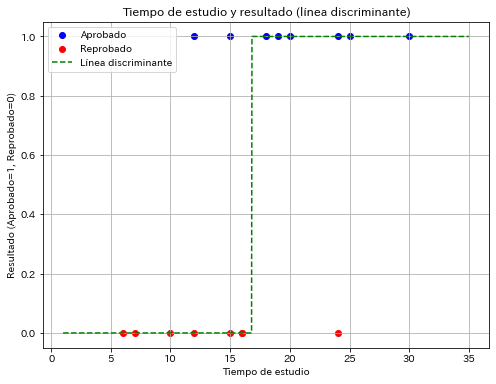

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Conversión de resultado a valor numérico（Aprobado: 1, Reprobado: 0）
df['Resultado'] = df['Resultado'].map({'Aprobado': 1, 'Reprobado': 0})

# Separación de características y objetivo
X = df[['Tiempo de estudio']]
y = df['Resultado']

# Aplicación de modelo de Análisis Discriminante Lineal (LDA)
lda = LDA()
lda.fit(X, y)

# Coeficiente e intercepto de la función discriminante
coef = lda.coef_[0][0]
intercept = lda.intercept_[0]
print(f"Función discriminante linear: y = {coef:.3f} * x + {intercept:.3f}")

# Predicción del modelo
predictions = lda.predict(X)

# Cálculo de la tasa de error de clasificación
accuracy = accuracy_score(y, predictions)
misclassification_rate = 1 - accuracy

print(f"Tasa de erro: {misclassification_rate:.3f}")

# Representar el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['Tiempo de estudio'][df['Resultado'] == 1], [1] * len(df[df['Resultado'] == 1]), color='blue', label='Aprobado')
plt.scatter(df['Tiempo de estudio'][df['Resultado'] == 0], [0] * len(df[df['Resultado'] == 0]), color='red', label='Reprobado')

# Construcción de la línea discriminante
# Cálculo de la frontera de decisión para LDA
x_values = np.linspace(df['Tiempo de estudio'].min() - 5, df['Tiempo de estudio'].max() + 5, 1000)
x_values_df = pd.DataFrame(x_values, columns=['Tiempo de estudio'])
y_values = lda.predict(x_values_df)

# Representar la línea discriminante
plt.plot(x_values, y_values, color='green', linestyle='--', label='Línea discriminante')

# Configuración del gráfico
plt.title('Tiempo de estudio y resultado (línea discriminante)')
plt.xlabel('Tiempo de estudio')
plt.ylabel('Resultado (Aprobado=1, Reprobado=0)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Análisis de clúster

El análisis de clúster es un método que, basado en la similitud o disimilitud, agrupa grandes conjuntos de datos. Consiste en agrupar elementos similares en varios grupos (clústeres).

* Análisis de clúster jerárquico
* Análisis de clúster no jerárquico

In [11]:
notebook_name = 'QCKentei1-10.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}

[NbConvertApp] Converting notebook QCKentei1-10.ipynb to html
[NbConvertApp] Writing 649658 bytes to QCKentei1-10.html
